In [1]:
import torch
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
mesh = torch.load("ts0.20/candle.tch")

In [4]:
sal_p3d = mesh["tex_saliency"]["p3d"].numpy()

In [5]:
np.transpose(sal_p3d[0].nonzero())


array([[  0,   0],
       [  0, 136],
       [  0, 138],
       ...,
       [167, 114],
       [167, 115],
       [167, 116]], dtype=int64)

In [7]:
data = pd.DataFrame(np.transpose(sal_p3d[0].nonzero()) ,columns=['x','y'])

In [ ]:
data

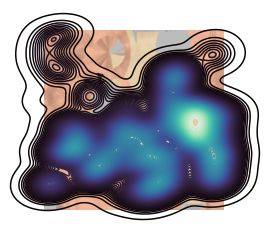

In [11]:
img = mesh["textures"]["candle_01"].numpy()
plt.imshow(img)
ax = sns.kdeplot(
    data=data, x="x", y="y",
    fill=False, thresh=0.001, levels=150, cmap="mako",
)

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)
ax.axis('off')
plt.show()

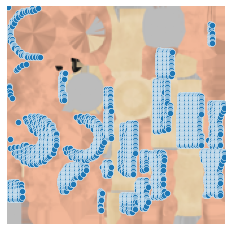

(168, 168, 3)


In [12]:
img = mesh["textures"]["candle_01"].numpy()
plt.imshow(img)
ax = sns.scatterplot(
    data=data, x="x", y="y",
    
)

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)
ax.axis('off')
plt.show()
print(img.shape)

In [13]:
mesh.keys()

dict_keys(['saliency_threshold', 'textures', 'views', 'view_saliency', 'tex_saliency'])

In [14]:
mesh["textures"]["candle_01"].numpy().shape

(168, 168, 3)

In [20]:
from scipy.ndimage.filters import gaussian_filter
import numpy as np
import matplotlib.cm as cm

(1500, 1500)


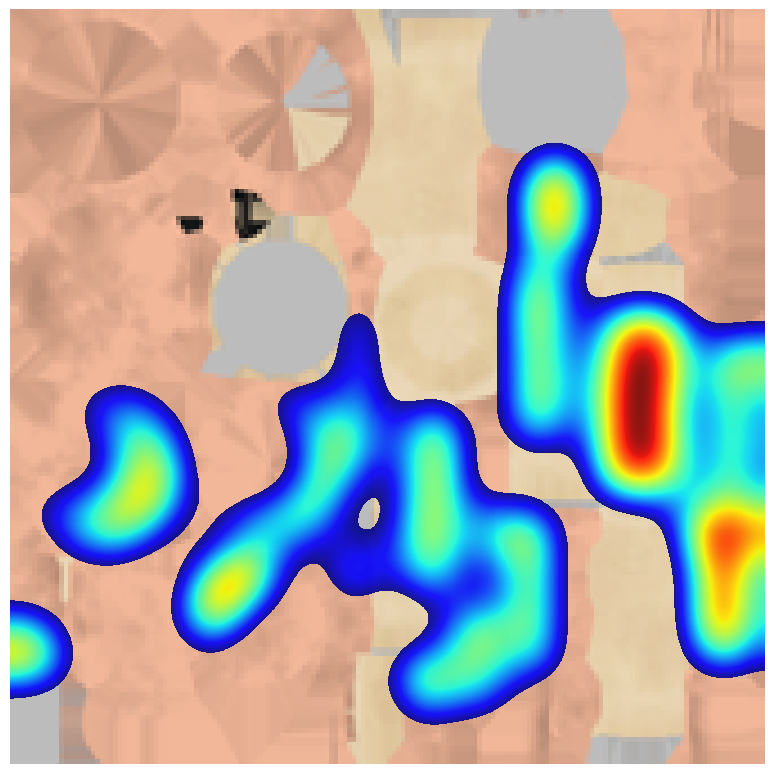

In [28]:
def myplot(x, y, s, bins=1000):

    ranges =[[0, 168], [0, 168]]
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=1500, range= ranges)
    heatmap = gaussian_filter(heatmap, sigma=s)
    print(heatmap.shape)
    # remove 
    lowbound = np.mean(heatmap[heatmap > 0])
    heatmap[heatmap < lowbound] = np.NaN    
    #resize heatmap
    #print(heatmap.shape)
    extent = [  xedges[-1], xedges[0],yedges[-1], yedges[0],]
    return heatmap.T, extent


MY_DPI = 96
IMG_WIDTH = 1000
IMG_HEIGHT = 1000
fig = plt.figure(figsize=(IMG_WIDTH / MY_DPI, IMG_HEIGHT / MY_DPI), dpi=MY_DPI)
ax = fig.add_subplot(111, frameon=False, xticks=[], yticks=[])

#img = Image.open("carpark.png")
#img = PIL.ImageOps.invert(img)
##img = img.convert("LA").resize((240, 180), Image.ANTIALIAS)
plt.imshow(img)

s  = 50
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)
ax.axis('off')
#ax.plot(foas7["foay"] , foas7["foax"],'k.', markersize=1)

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim() 

img2, ext = myplot(data["x"], data["y"], s)             
extent = [ xmin, xmax , ymin, ymax]
plt.imshow(img2, extent=extent, origin='upper', cmap=cm.jet, alpha=0.9)
plt.savefig("heatmap_carpark_regular.png",  bbox_inches='tight')
